# form bohrium
Multitask model加速GNN模型预测\
本文的案例来自nature communication2022(https://www.nature.com/articles/s41467-022-30994-1) ，这一篇文献从分子动力学模拟中学习大量有偏、有噪声的数据和少量无偏数据来加速聚合物电解质的高通量计算筛选。为了减少模拟的偏差，文献对搜索区域中每种聚合物进行了一次MD模拟，并学习了聚合物之间的共享模型，以恢复从重复模拟中获得的真实属性；为了减少MD计算时间长的问题，进行了大量的短时间、非收敛的MD仿真和少量的长时间、收敛的仿真；为了从低精度模拟属性扩展到高精度模拟属性，通过多任务学习来学习两种属性之间的修正的方式。

In [7]:
import torch
import torch_geometric
import rdkit

In [9]:
! tree ./data/polymernet/data/conductivity

./data/polymernet/data/conductivity
├── 50ns
│   ├── cv_0.csv
│   ├── cv_1.csv
│   ├── cv_2.csv
│   ├── cv_3.csv
│   ├── cv_4.csv
│   ├── cv_5.csv
│   ├── cv_6.csv
│   ├── cv_7.csv
│   ├── cv_8.csv
│   ├── cv_9.csv
│   └── test.csv
├── 50ns_extrapolate
│   ├── cv_0.csv
│   ├── cv_1.csv
│   ├── cv_2.csv
│   ├── cv_3.csv
│   ├── cv_4.csv
│   ├── cv_5.csv
│   ├── cv_6.csv
│   ├── cv_7.csv
│   ├── cv_8.csv
│   ├── cv_9.csv
│   └── test.csv
├── 5ns
│   ├── cv_0.csv
│   ├── cv_1.csv
│   ├── cv_2.csv
│   ├── cv_3.csv
│   ├── cv_4.csv
│   ├── cv_5.csv
│   ├── cv_6.csv
│   ├── cv_7.csv
│   ├── cv_8.csv
│   ├── cv_9.csv
│   ├── pred.csv
│   └── test.csv
└── cond_5ns_new_config.csv

4 directories, 35 files


### 聚合物id、SMILE名称和MD计算的离子传导率

In [11]:
! head data/polymernet/data/conductivity/5ns/cv_0.csv

9-0-413616244-0,CN(CCCN(C)CCOC(=O)[Au])CCO[Cu],0.00017827816102107538
9-0-538226084-0,CC(COCCOCCOC(=O)[Au])O[Cu],0.00020509371483390544
9-0-33222100-0,C=CC(COC(=O)[Au])NCC(COC)O[Cu],0.0001301783890331634
9-0-246210842-0,CC(CCO[Cu])NC(C)C(C)(C)OC(=O)[Au],2.465121877993986e-05
9-0-413690717-0,CC(C)(CO[Cu])C(=O)NCC=CCOC(=O)[Au],4.339674367150885e-05
9-0-1119507515-0,CC(C)(NCC(CO[Cu])OC(=O)[Au])C(=O)O,4.462199095252281e-05
9-0-962050944-0,O=C([Au])NCCSCCCSCCN[Cu],0.00015008015756796058
9-0-13127562-0,CC(CNCC#CCO[Cu])OC(=O)[Au],7.655827506140518e-05
9-0-1119510779-0,CN(CCCO[Cu])C(=O)COC(=O)[Au],6.0616822240295196e-05
9-0-413632785-0,O=C([Au])OCCNC(=O)C(CC(F)F)N[Cu],2.8385849750179147e-05


In [12]:
! cd data/polymernet && python single_task_train.py --log10 0 data/logp/noise_5.12

Type train csvs ['cv_1.csv', 'cv_2.csv', 'cv_3.csv', 'cv_4.csv', 'cv_5.csv', 'cv_6.csv', 'cv_7.csv', 'cv_8.csv', 'cv_9.csv']
Type val csvs ['cv_0.csv']
Type test csvs ['test.csv']
/home/jhe378/anaconda3/envs/py39/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
Type pred csvs ['pred.csv']
/home/jhe378/anaconda3/envs/py39/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)
Epoch: 000, LR: 0.001000, Loss: 0.9983989, Validation MAE: 3.7543356, Best Validation MAE: 3.7543356, Test MAE: 4.1978437
Epoch: 001, LR: 0.001000, Loss: 1.0031302, Validation MAE: 3.6762261, Best Validation MAE: 3.6762261, Test MAE: 4.2092862
Epoch: 002, LR: 0.001000, Loss: 0.9844314, Validation MAE: 3.7761691, Best Validation MAE: 3.6762261, Test MAE: 4.2092862
Epoch: 003, LR:

In [16]:
! cd data/polymernet && python single_task_rf.py --log10 0 data/logp/noise_5.12

Type train csvs ['cv_1.csv', 'cv_2.csv', 'cv_3.csv', 'cv_4.csv', 'cv_5.csv', 'cv_6.csv', 'cv_7.csv', 'cv_8.csv', 'cv_9.csv']
Type val csvs ['cv_0.csv']
Type test csvs ['test.csv']
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGenerator
[20:14:01] DEPRECATION WARNING: please use MorganGene

In [17]:
! cd data/polymernet && python multi_task_train.py data/conductivity/5ns data/conductivity/50ns

Type train csvs ['cv_1.csv', 'cv_2.csv', 'cv_3.csv', 'cv_4.csv', 'cv_5.csv', 'cv_6.csv', 'cv_7.csv', 'cv_8.csv', 'cv_9.csv']
Type val csvs ['cv_0.csv']
Type test csvs ['test.csv']
Type train csvs ['cv_1.csv', 'cv_2.csv', 'cv_3.csv', 'cv_4.csv', 'cv_5.csv', 'cv_6.csv', 'cv_7.csv', 'cv_8.csv', 'cv_9.csv']
Type val csvs ['cv_0.csv']
Type test csvs ['test.csv']
/home/jhe378/anaconda3/envs/py39/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
Type pred csvs ['pred.csv']
/home/jhe378/anaconda3/envs/py39/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)
Epoch: 000, LR: 0.001000, Loss: 1.0791994, Validation exp MAE: 0.1945751,  Validation sim MAE: 0.1830985, Best Validation MAE: 0.1945751, Test exp MAE: 0.1930995, Test sim MAE: 0.1428152
Epoch: 001, LR

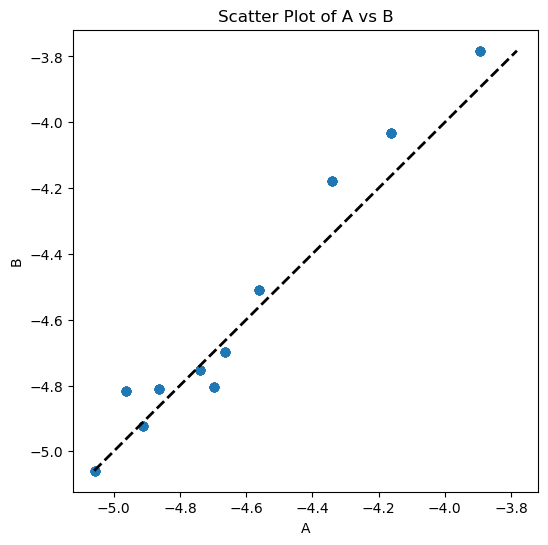

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# 读取csv文件
data_exp = pd.read_csv('./data/polymernet/exp_test_results.csv')
data=data_exp
# 提取需要绘制的两列数据
x_e = data.iloc[:, 1] 
y_e = data.iloc[:, 2]

# 创建一个图形和坐标轴
fig, ax = plt.subplots(figsize=(6, 6))

# 绘制散点图
plt.scatter(x_e, y_e)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatter Plot of A vs B')

# 计算对角线起点和终点
min_value = min(min(x_e), min(y_e))
max_value = max(max(x_e), max(y_e))

# 绘制对角线
ax.plot([min_value, max_value], [min_value, max_value], color='black', linestyle='--', linewidth=2, label='Diagonal Line')

# 显示图形
plt.show()

In [21]:
data_exp

,9-0-1132292337-0,-5.0566964,-5.0589776
0,9-0-976282215-0,-4.739058,-4.753141
1,9-0-413608679-0,-4.698324,-4.803331
2,9-0-1119513215-0,-4.561417,-4.508426
3,9-0-413643927-0,-4.340203,-4.179244
4,9-0-428453326-0,-4.163155,-4.031896
...,...,...,...
81,9-0-428453326-0,-4.163155,-4.031896
82,9-0-413631415-0,-4.864493,-4.809859
83,9-0-413610849-0,-4.962752,-4.818164
84,9-0-246412455-0,-4.663029,-4.698242
